In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

import statsmodels.formula.api as smf


Problem 2:<br>
Consider only the below columns and prepare a prediction model for predicting Price.<br>

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]<br>



* Model -- model of the car
* Price  -- Offer Price in EUROs
* Age_08_04 -- Age in months as in August 2004
* Mfg_Month -- Manufacturing month (1-12)
* Mfg_Year	-- Manufacturing Year
* KM -- Accumulated Kilometers on odometer
* Fuel_Type	 -- Fuel Type (Petrol, Diesel, CNG)
* HP -- Horse Power
* Met_Color	 -- Metallic Color?  (Yes=1, No=0)
* Color -- Color (Blue, Red, Grey, Silver, Black, etc.)
* Automatic	-- Automatic (Yes=1, No=0)
* cc -- Cylinder Volume in cubic centimeters
* Doors -- Number of doors
* Cylinders	-- Number of cylinders
* Gears -- Number of gear positions
* Quarterly_Tax -- Quarterly road tax in EUROs
* Weight -- Weight in Kilograms
* Mfr_Guarantee -- Within Manufacturer's Guarantee period  (Yes=1, No=0)
* BOVAG_Guarantee -- BOVAG (Dutch dealer network) Guarantee  (Yes=1, No=0)
* Guarantee_Period -- 	Guarantee period in months
* ABS -- Anti-Lock Brake System (Yes=1, No=0)
* Airbag_1 -- Driver_Airbag  (Yes=1, No=0)
* Airbag_2 -- Passenger Airbag  (Yes=1, No=0)
* Airco -- Airconditioning  (Yes=1, No=0)
* Automatic_airco -- Automatic Airconditioning  (Yes=1, No=0)
* Boardcomputer -- Boardcomputer  (Yes=1, No=0)
* CD_Player -- CD Player  (Yes=1, No=0)
* Central_Lock -- Central Lock  (Yes=1, No=0)
* Powered_Windows -- Powered Windows  (Yes=1, No=0)
* Power_Steering -- Power Steering  (Yes=1, No=0)
* Radio -- Radio  (Yes=1, No=0)
* Mistlamps	-- Mistlamps  (Yes=1, No=0)
* Sport_Model -- Sport Model  (Yes=1, No=0)
* Backseat_Divider -- Backseat Divider  (Yes=1, No=0)
* Metallic_Rim --Metallic Rim  (Yes=1, No=0)
* Radio_cassette -- Radio Cassette  (Yes=1, No=0)
* Tow_Bar -- Tow Bar  (Yes=1, No=0)


In [2]:
import chardet

#To detect the encodeing of the csv file
with open('ToyotaCorolla.csv','rb') as f:
  result=chardet.detect(f.read())

print(result['encoding'])

ISO-8859-1


In [3]:
data=pd.read_csv('ToyotaCorolla.csv',encoding='ISO-8859-1')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [5]:
Corolla=data.loc[:,["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [6]:
Corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
Corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [8]:
Corolla.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

Comment:<br>
* No null value in the data

In [9]:
Corolla.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [10]:
#finding correlation between the variables

Corolla.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [11]:
Corolla.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

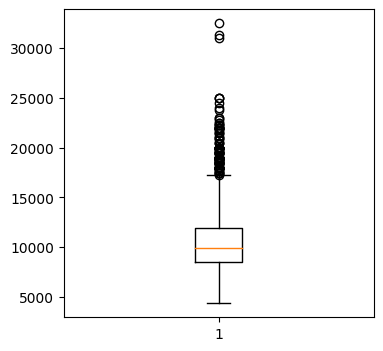

In [12]:
plt.figure(figsize=(4,4))
plt.boxplot(Corolla['Price']);

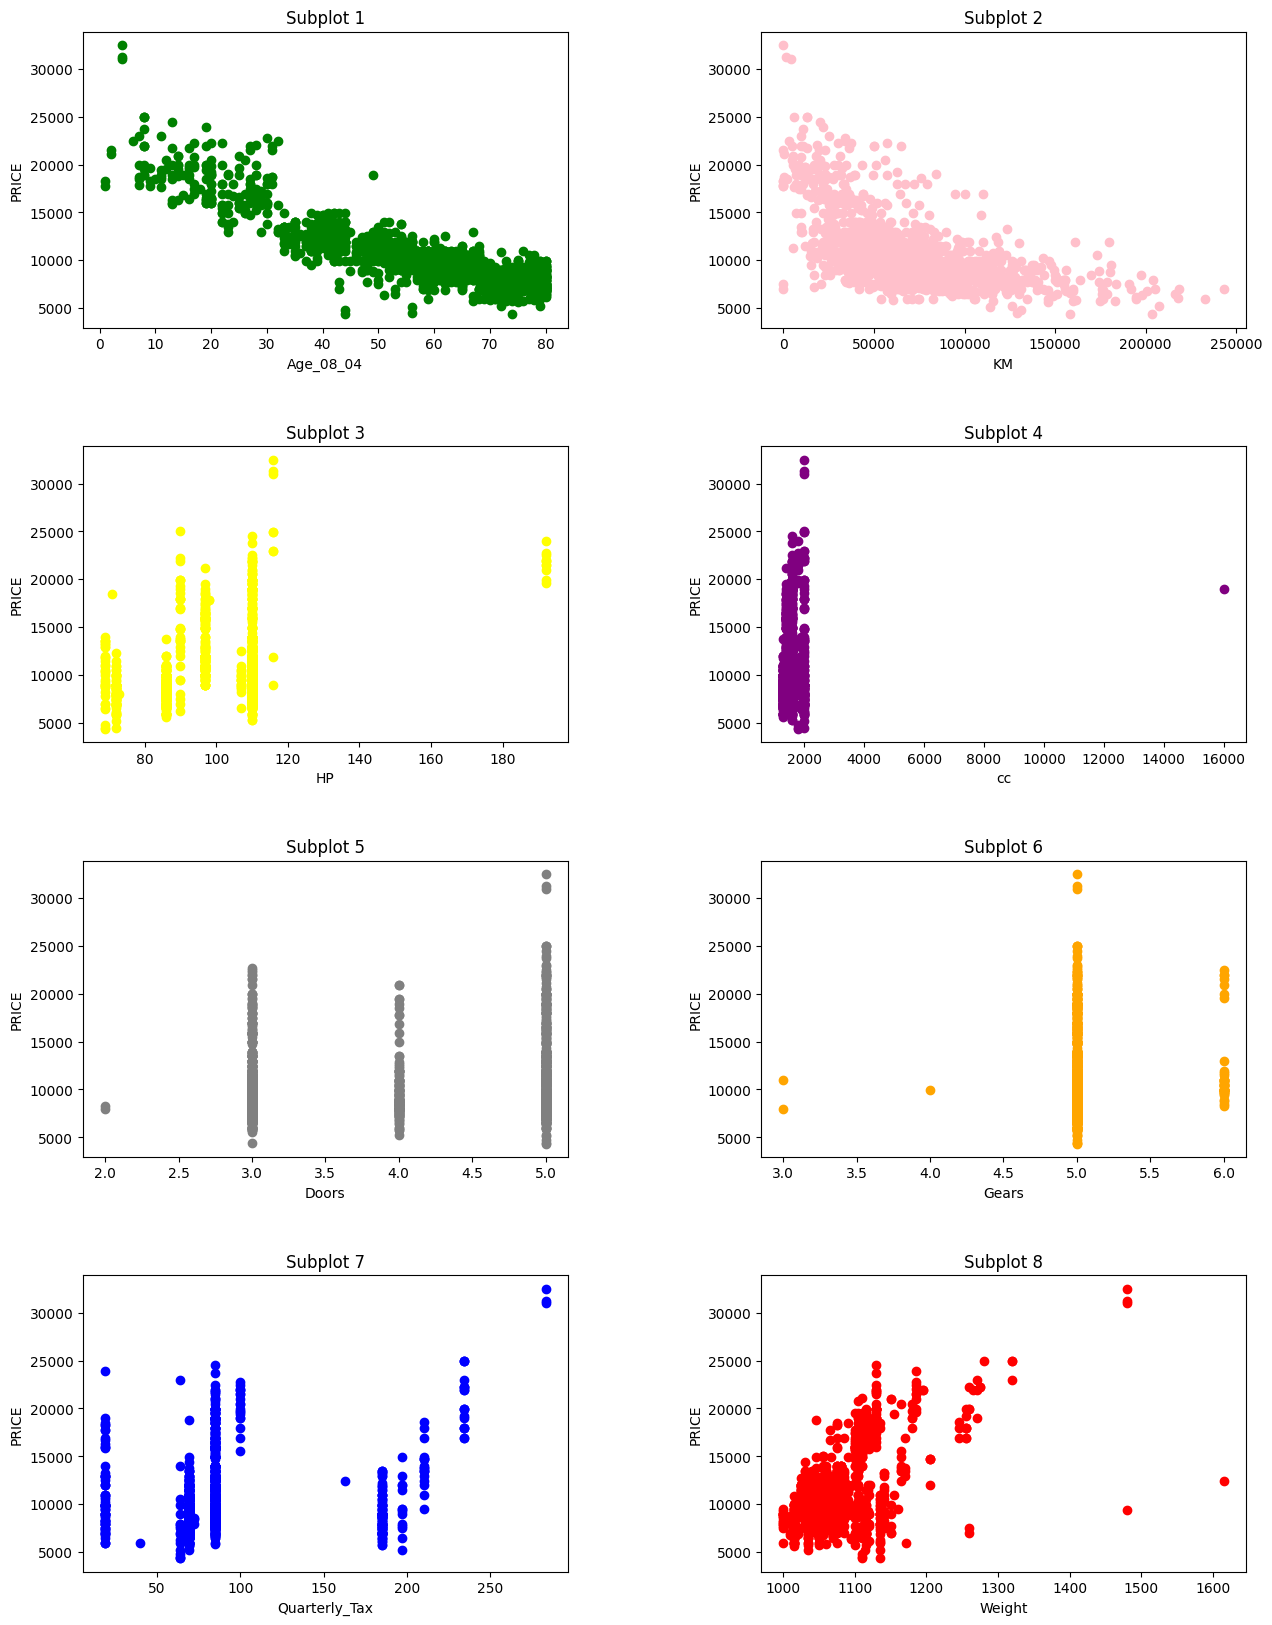

In [13]:
# Creating subplots to determine the relationship between features and target variable
# featues='Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears','Quarterly_Tax', 'Weight'
# target ='Price'

plt.figure(figsize=(15,20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Create the first subplot
plt.subplot(4, 2, 1)
plt.scatter(Corolla['Age_08_04'],Corolla['Price'],color='green')
plt.title('Subplot 1')
plt.xlabel('Age_08_04',size=10)
plt.ylabel('PRICE',size=10)

# Create the second subplot
plt.subplot(4, 2, 2)
plt.scatter(Corolla['KM'],Corolla['Price'],color='pink')
plt.title('Subplot 2')
plt.xlabel('KM',size=10)
plt.ylabel('PRICE',size=10)

# Create the third subplot
plt.subplot(4, 2, 3)
plt.scatter(Corolla['HP'],Corolla['Price'],color='yellow')
plt.title('Subplot 3')
plt.xlabel('HP',size=10)
plt.ylabel('PRICE',size=10)

# Create the forth subplot
plt.subplot(4, 2, 4)
plt.scatter(Corolla['cc'],Corolla['Price'],color='purple')
plt.title('Subplot 4')
plt.xlabel('cc',size=10)
plt.ylabel('PRICE',size=10)

# Create the fifth subplot
plt.subplot(4, 2, 5)
plt.scatter(Corolla['Doors'],Corolla['Price'],color='grey')
plt.title('Subplot 5')
plt.xlabel('Doors',size=10)
plt.ylabel('PRICE',size=10)

# Create the sixth subplot
plt.subplot(4, 2, 6)
plt.scatter(Corolla['Gears'],Corolla['Price'],color='orange')
plt.title('Subplot 6')
plt.xlabel('Gears',size=10)
plt.ylabel('PRICE',size=10)

# Create the seventh subplot
plt.subplot(4, 2, 7)
plt.scatter(Corolla['Quarterly_Tax'],Corolla['Price'],color='blue')
plt.title('Subplot 7')
plt.xlabel('Quarterly_Tax',size=10)
plt.ylabel('PRICE',size=10)

# Create the eighth subplot
plt.subplot(4, 2, 8)
plt.scatter(Corolla['Weight'],Corolla['Price'],color='red')
plt.title('Subplot 8')
plt.xlabel('Weight',size=10)
plt.ylabel('PRICE',size=10)

# Show the figure with subplots
plt.show()


Comment:<br>
* 'Age_08_04',is negatively related to the 'Price'
* 'KM' is negatively related to the 'Price'.
*  'HP','cc','Doors', 'Gears','Quarterly_Tax','Weight' are positively related to 'Price'.

## Building a Model without any change in original data

In [14]:
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Corolla).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        10:07:31   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [16]:
features=Corolla.iloc[:,1:]
#features

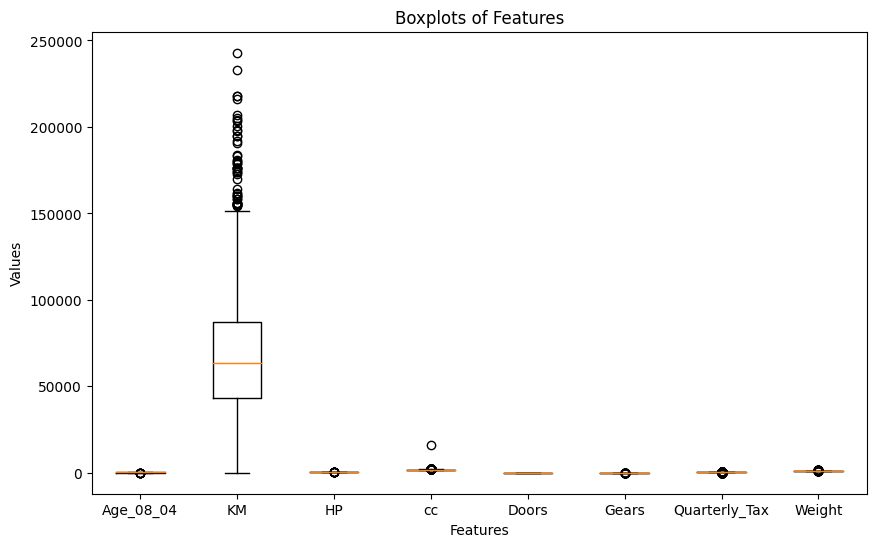

In [17]:
# Create boxplots for each feature in 'features'
plt.figure(figsize=(10,6))
plt.boxplot(features.values)  # .values is used to convert the DataFrame to a numpy array

# Set labels for the x-axis ticks
plt.xticks(range(1, len(features.columns) + 1), features.columns)


# Add labels and a title
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplots of Features')

# Show the plot
plt.show()


## Assumption 1:-Checking for Multicollinearity


### 1) Heat map or correlation matrix--use for checking multicollinearity

In [18]:
features.columns

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

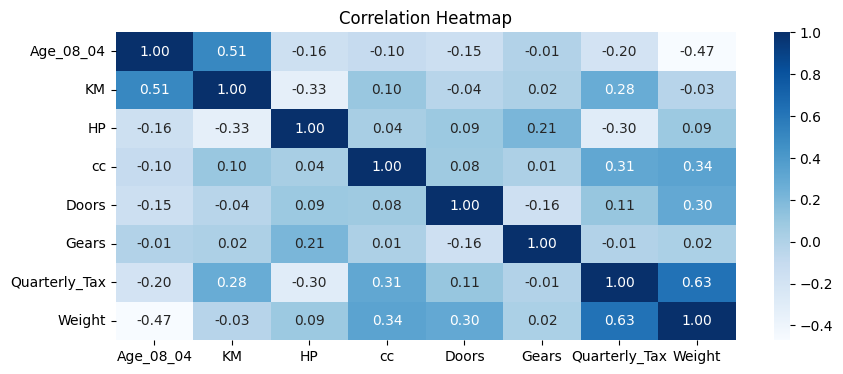

In [19]:
# Calculate the features correlation matrix
corr_matrix = features[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']].corr()

# Create a heatmap
plt.figure(figsize=(10,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap=plt.cm.Blues)  # annot=True add values to cells
plt.title('Correlation Heatmap')
plt.show()

Comment:<br>
* by the correlation heatmap we can observe that features are somehow correlated to each other.
* 'Age_08_04', 'KM' are 51% correlated to each other
* 'Quarterly_Tax','Weight' are 63% correlated to each other
* Our Assumption says that features shold be independent of each other ,therefore our assumption doesn't satisfy here
* Data needs imporvement

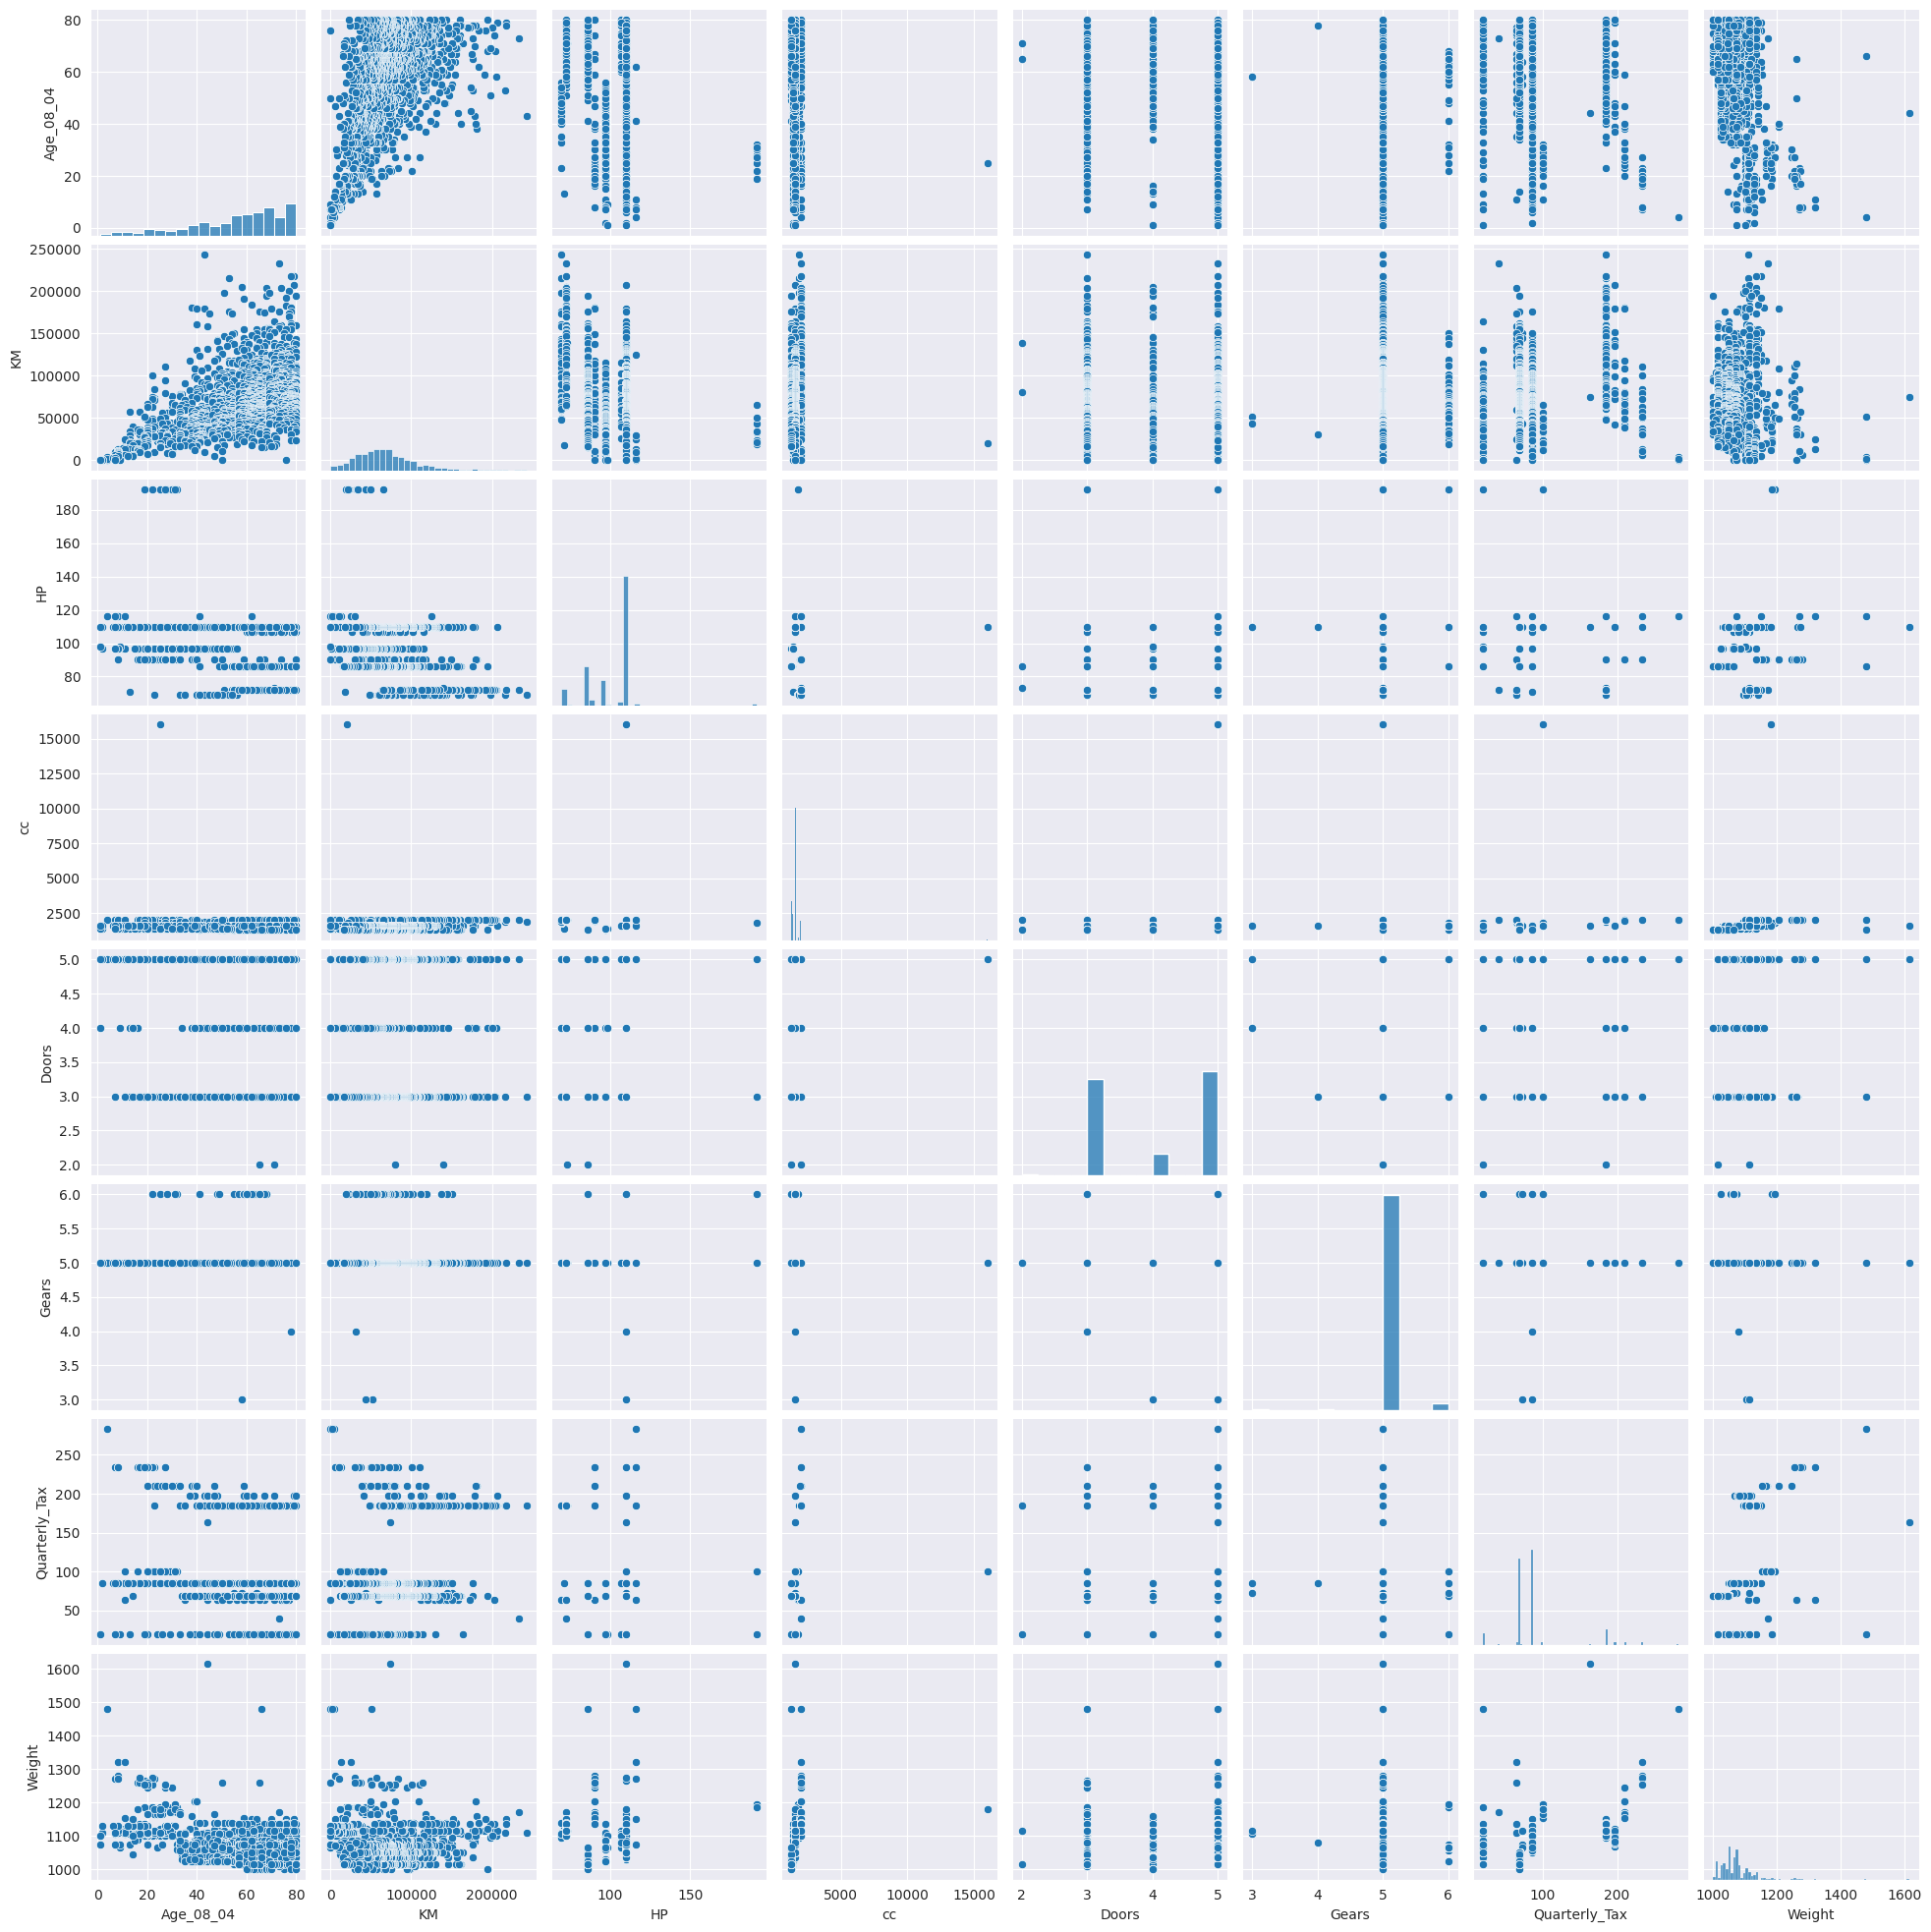

In [20]:
sns.set_style(style='darkgrid')
sns.pairplot(features)


# not able to visualize clearly

### 2) Calculating Variance Inflation Factor (VIF)--use for checking multicollinearity

In [21]:
features.columns

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

In [22]:
rsq_Age_08_04=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Corolla).fit().rsquared
vif_Age_08_04=1/(1-rsq_Age_08_04)

rsq_KM=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Corolla).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=Corolla).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=Corolla).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_Doors=smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=Corolla).fit().rsquared
vif_Doors=1/(1-rsq_Doors)

rsq_Gears=smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=Corolla).fit().rsquared
vif_Gears=1/(1-rsq_Gears)

rsq_Quarterly_Tax=smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=Corolla).fit().rsquared
vif_Quarterly_Tax=1/(1-rsq_Quarterly_Tax)

rsq_Weight=smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=Corolla).fit().rsquared
vif_Weight=1/(1-rsq_Weight)

#Storing VIF values in the dataframe
df={'Features':['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax','Weight'],
    'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
vif_df=pd.DataFrame(df)
vif_df

,Features,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


Comment:<br>
* There exist some amount of multicollinearity ,but as it is less than 5 ,it is fine.
* No treatment for multicollinearity.

## Assumption 2:- Residual Analysis

In [23]:
model.resid

0      -3312.580505
1      -2522.355186
2      -2850.732460
3      -1476.496731
4      -2472.419010
           ...     
1431   -1293.758297
1432    2553.661579
1433      45.701993
1434   -1328.038121
1435   -3452.438333
Length: 1436, dtype: float64

In [24]:
model.resid.min()

-9366.422081179007

In [25]:
model.resid.max()

6444.021866865121

In [26]:
model.resid.mean()

3.6572226002802007e-09

In [27]:
model.resid.median()

-21.343493243555713

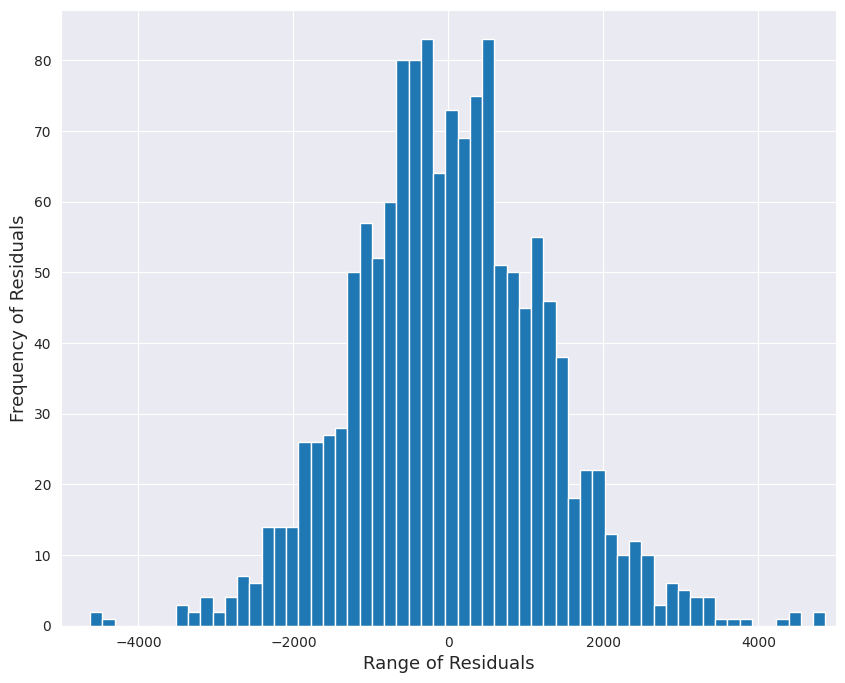

In [28]:
#Plotting histogram

plt.figure(figsize=(10,8))
plt.hist(model.resid,bins=100)
plt.xlim(-5000,5000)
plt.xlabel('Range of Residuals',size=13)
plt.ylabel('Frequency of Residuals',size=13)
plt.show();

Comment:<br>
* Mean of the residual is around zero.
* This is not exactly bell shaped curve.
* That means error doesn't distributed normally arround the mean zero
* residual vales goes normally to the range of 3000(approx).
* Our assumption that says, the errors (residuals) should normally distributed with a mean of 0, is not satisfied .Therefore models requires the transformations.


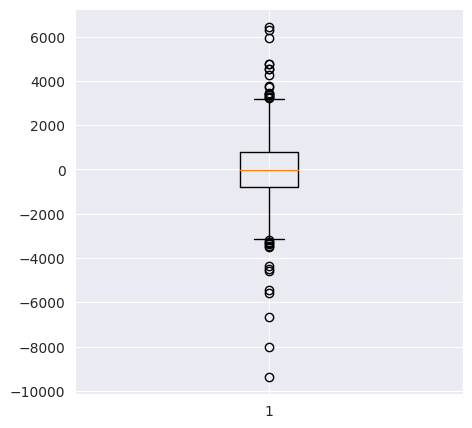

In [29]:
plt.figure(figsize=(5,5))
plt.boxplot(model.resid)
plt.show();

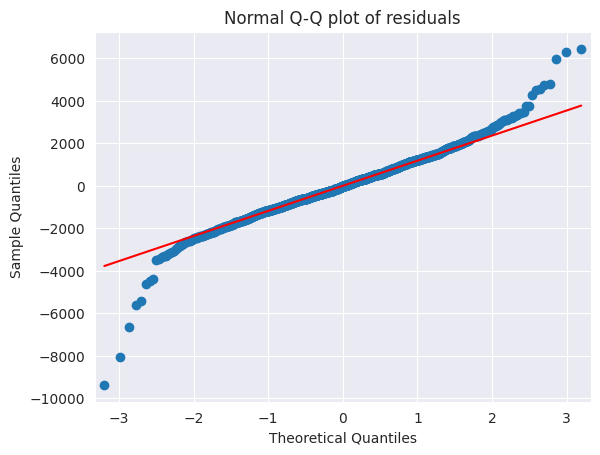

In [30]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

## Assumption 3:-Homoscedasticity

In [31]:
def get_standardize_values(vals):
  return(vals-vals.mean())/vals.std()

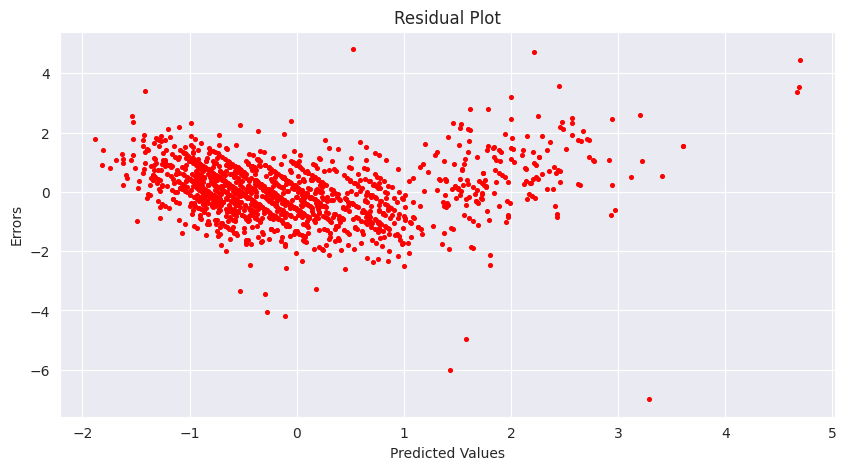

In [32]:
#Plotting predicted values versus residuals

plt.figure(figsize=(10,5))
plt.scatter(get_standardize_values(model.fittedvalues),
            get_standardize_values(model.resid),s=7,color='red')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Errors')
plt.show()

Comment:<br>

* Residual vs. Fitted Values Plot: This plot compares the residuals to the predicted values. In a homoscedastic dataset, the spread of residuals should be roughly constant across all levels of predicted values. If the spread of residuals widens or narrows systematically as you move along the predicted values, it suggests heteroscedasticity.

* Here we can observe that the plot is randomly scattered there is not any pattern followed ,therefore it is  Homoscedasticity and Assumption fulfilled.

* There is some potential Outlier which can be ignored

* Also the variance of error is not  exactly constant there is some level of variation in the error


## Assumption 4:- Errors and Features should be independent

In [33]:
features.columns

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

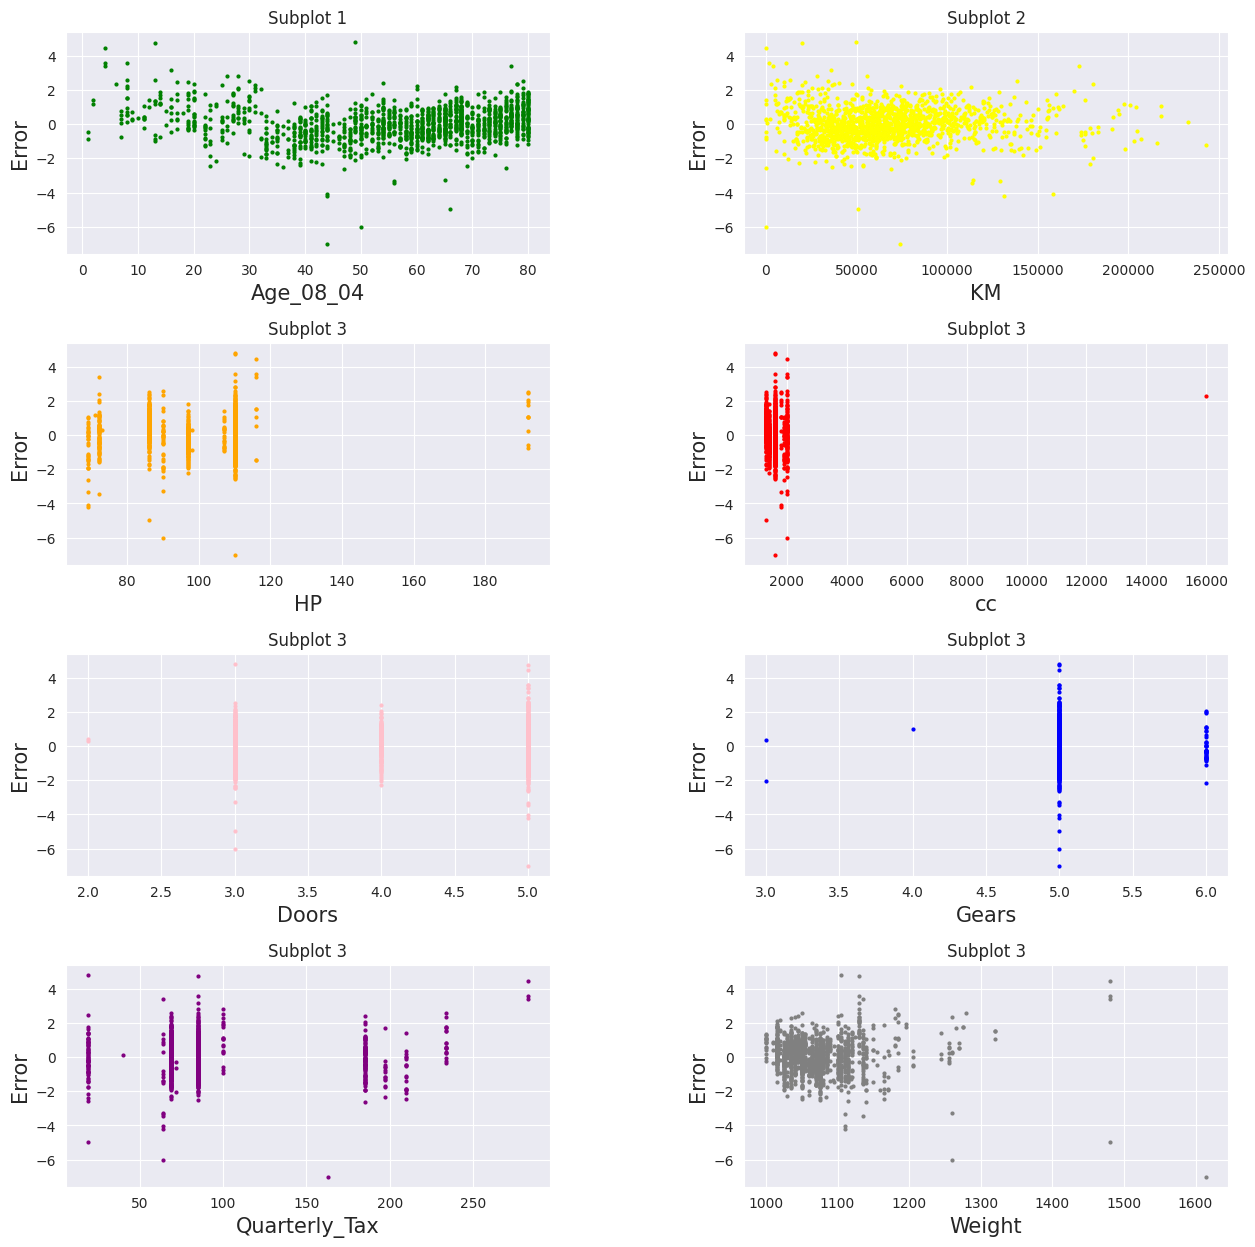

In [34]:
# Creating subplots

plt.figure(figsize=(15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Create the first subplot
plt.subplot(4, 2, 1)
plt.scatter(features['Age_08_04'],
            get_standardize_values(model.resid),color='green',s=4)
plt.title('Subplot 1')
plt.xlabel('Age_08_04',size=15)
plt.ylabel('Error',size=15)

# Create the second subplot
plt.subplot(4,2, 2)
plt.scatter(features['KM'],
            get_standardize_values(model.resid),color='yellow',s=4)
plt.title('Subplot 2')
plt.xlabel('KM',size=15)
plt.ylabel('Error',size=15)

# Create the third subplot
plt.subplot(4,2, 3)
plt.scatter(features['HP'],
            get_standardize_values(model.resid),color='orange',s=4)
plt.title('Subplot 3')
plt.xlabel('HP',size=15)
plt.ylabel('Error',size=15)

# Create the forth subplot
plt.subplot(4, 2, 4)
plt.scatter(features['cc'],
            get_standardize_values(model.resid),color='red',s=4)
plt.title('Subplot 3')
plt.xlabel('cc',size=15)
plt.ylabel('Error',size=15)

# Create the fifth subplot
plt.subplot(4,2,5)
plt.scatter(features['Doors'],
            get_standardize_values(model.resid),color='pink',s=4)
plt.title('Subplot 3')
plt.xlabel('Doors',size=15)
plt.ylabel('Error',size=15)

# Create the sixth subplot
plt.subplot(4,2,6)
plt.scatter(features['Gears'],
            get_standardize_values(model.resid),color='blue',s=4)
plt.title('Subplot 3')
plt.xlabel('Gears',size=15)
plt.ylabel('Error',size=15)

# Create the seventh subplot
plt.subplot(4,2,7)
plt.scatter(features['Quarterly_Tax'],
            get_standardize_values(model.resid),color='purple',s=4)
plt.title('Subplot 3')
plt.xlabel('Quarterly_Tax',size=15)
plt.ylabel('Error',size=15)

# Create the eighth subplot
plt.subplot(4,2,8)
plt.scatter(features['Weight'],
            get_standardize_values(model.resid),color='grey',s=4)
plt.title('Subplot 3')
plt.xlabel('Weight',size=15)
plt.ylabel('Error',size=15)

# Show the figure with subplots
plt.show()


In [ ]:
#soemthing relation between error and features need to be correct---------how?

## Outlier Detection
 Using Cook's distance

In [35]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [36]:
features.shape

(1436, 8)

In [37]:
#threshhold for cooks distance

K=8           #K = no of features
N=1436        #N = no of rows/observations
(3*K)/N

0.016713091922005572

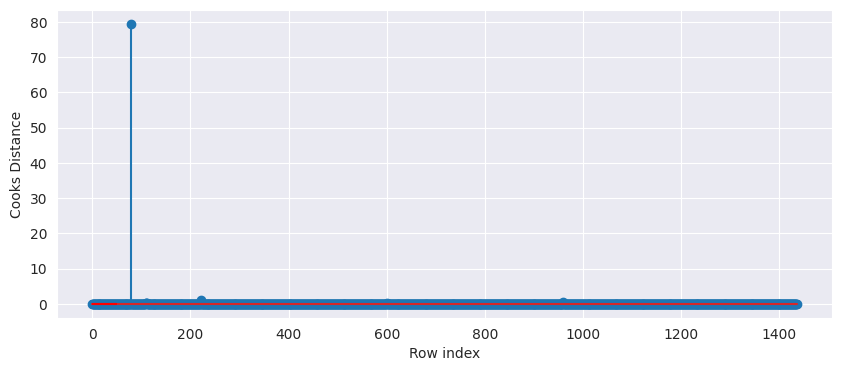

In [38]:
plt.figure(figsize=(10,4))
plt.stem(np.arange(len(Corolla)),np.round(c,8))
plt.hlines(y=0.016713091922005572,xmin=0,xmax=50,color='red')
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [39]:
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

In [40]:
np.argmax(c),np.max(c)

(80, 79.52010624141815)

In [41]:
np.where(c>=0.18)     #outliers indexes

(array([ 80, 221, 960]),)

Comment:<br>
* Outliers detected by the cook's distance
* Model needs to improve by deleting the outliers

In [42]:
Corolla

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [43]:
#Discard the data points which are influencers and reasign the row number (reset_index())

Corolla1=Corolla.drop(Corolla.index[[80,221,960]],axis=0).reset_index()

In [44]:
#droping the original index

Corolla1=Corolla1.drop(['index'],axis=1)

In [45]:
Corolla1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [46]:
Corolla1.shape

(1433, 9)

In [47]:
Corolla1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1433 non-null   int64
 1   Age_08_04      1433 non-null   int64
 2   KM             1433 non-null   int64
 3   HP             1433 non-null   int64
 4   cc             1433 non-null   int64
 5   Doors          1433 non-null   int64
 6   Gears          1433 non-null   int64
 7   Quarterly_Tax  1433 non-null   int64
 8   Weight         1433 non-null   int64
dtypes: int64(9)
memory usage: 100.9 KB


In [48]:
Corolla1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [49]:
Corolla1.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

## Building New Model

In [50]:
model1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Corolla1 ).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1372.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        10:10:59   Log-Likelihood:                -12226.
No. Observations:                1433   AIC:                         2.447e+04
Df Residuals:                    1424   BIC:                         2.452e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.474e+04   1432.942    -10.289      0.000   -1.76e+04   -1.19e+04
Age_08_04      -112.0180      2.479    -45.185      0.000    -116.881    -107.155
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               36.6084      2.745     13.334      0.000      31.223      41.994
cc               -3.7954      0.302    -12.562      0.000      -4.388      -3.203
Doors          -122.5437     37.480     -3.270      0.001    -196.067     -49.021
Gears           464.9839    180.976      2.569      0.010     109.975     819.993
Quarterly_Tax     5.2134      1.371      3.802      0.000       2.523       7.904
Weight           30.6398      1.290     23.748      0.000      28.109      33.171
==============================================================================
Omnibus:                      121.821   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              704.567
Skew:                          -0.082   Prob(JB):                    1.01e-153
Kurtosis:                       6.431   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
model1=smf.ols('Price~np.log(Age_08_04)+np.log(KM)+HP+np.log(cc)+np.log(Doors)+Gears+Quarterly_Tax+Weight',data=Corolla1 ).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1028.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        10:11:00   Log-Likelihood:                -12406.
No. Observations:                1433   AIC:                         2.483e+04
Df Residuals:                    1424   BIC:                         2.488e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.612e+04   3310.599     13.932      0.000    3.96e+04    5.26e+04
np.log(Age_08_04) -5070.6184    114.480    -44.293      0.000   -5295.186   -4846.050
np.log(KM)          178.3730     46.903      3.803      0.000      86.367     270.379
HP                   56.1919      3.050     18.424      0.000      50.209      62.175
np.log(cc)        -6954.6588    513.896    -13.533      0.000   -7962.734   -5946.584
np.log(Doors)      -374.1382    165.206     -2.265      0.024    -698.211     -50.066
Gears               362.3669    204.822      1.769      0.077     -39.418     764.152
Quarterly_Tax         6.5936      1.569      4.204      0.000       3.517       9.671
Weight               24.3758      1.525     15.983      0.000      21.384      27.368
==============================================================================
Omnibus:                      289.289   Durbin-Watson:                   1.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2805.254
Skew:                          -0.646   Prob(JB):                         0.00
Kurtosis:                       9.732   Cond. No.                     9.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
model1=smf.ols('Price~np.log(Age_08_04)+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=Corolla1 ).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1228.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        10:11:02   Log-Likelihood:                -12296.
No. Observations:                1433   AIC:                         2.461e+04
Df Residuals:                    1424   BIC:                         2.466e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -541.7620   1694.543     -0.320      0.749   -3865.831    2782.307
np.log(Age_08_04) -4095.9085     98.775    -41.467      0.000   -4289.668   -3902.149
KM                   -0.0198      0.001    -16.011      0.000      -0.022      -0.017
HP                   39.7663      2.887     13.775      0.000      34.103      45.429
cc                   -3.0233      0.320     -9.435      0.000      -3.652      -2.395
Doors               -74.4527     39.432     -1.888      0.059    -151.803       2.898
Gears               639.7367    190.035      3.366      0.001     266.958    1012.515
Quarterly_Tax         9.5278      1.440      6.616      0.000       6.703      12.353
Weight               23.9710      1.441     16.637      0.000      21.145      26.797
==============================================================================
Omnibus:                      274.812   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3195.211
Skew:                          -0.531   Prob(JB):                         0.00
Kurtosis:                      10.238   Cond. No.                     3.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
model1=smf.ols('Price~np.log(Age_08_04)+np.log(KM)+np.log(HP)+np.log(cc)+np.log(Doors)+np.log(Gears)+np.log(Quarterly_Tax)+np.log(Weight)',data=Corolla1 ).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1012.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        10:11:03   Log-Likelihood:                -12415.
No. Observations:                1433   AIC:                         2.485e+04
Df Residuals:                    1424   BIC:                         2.490e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.625e+05   9553.429    -17.008      0.000   -1.81e+05   -1.44e+05
np.log(Age_08_04)     -5005.3706    116.455    -42.981      0.000   -5233.812   -4776.929
np.log(KM)              163.6822     47.300      3.460      0.001      70.896     256.468
np.log(HP)             5236.4001    276.174     18.961      0.000    4694.649    5778.151
np.log(cc)            -6935.3244    510.247    -13.592      0.000   -7936.241   -5934.408
np.log(Doors)          -579.5893    167.244     -3.466      0.001    -907.660    -251.518
np.log(Gears)          2594.0032   1034.480      2.508      0.012     564.735    4623.271
np.log(Quarterly_Tax)   548.8950    107.534      5.104      0.000     337.953     759.837
np.log(Weight)         3.041e+04   1652.599     18.402      0.000    2.72e+04    3.37e+04
==============================================================================
Omnibus:                      256.373   Durbin-Watson:                   1.443
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2249.644
Skew:                          -0.563   Prob(JB):                         0.00
Kurtosis:                       9.034   Cond. No.                     4.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""